# Google Data Analytics Professional Certificate Capstone Proejct

## Cyclistic Bike-Share Case Study

## Introduction

I have selected the Cyclistic bike share capstone project for my completion of the Google Data Analytics Professional Certificate. 

I will be invoking the general data analysis process learned from this course: Ask, Prepare, Process, Analyze, Share, and Act.

## Case Study Background Information

Cyclistic is a fictional bike share company in Chicago, Illinois. It features 5824 different bicycles and 692 bike docking stations dispersed throughout the city of Chicago. This bike share company is a bit different than others, as it has a selection of different bikes including: reclining bikes, hand tricycles, and cargo bikes. The bikes can be unlocked from one station and
returned to any other station in the system anytime.

Most riders opt for traditional bikes and about 8% of riders use the assistive options. Cyclistic users are more likely to ride for leisure, but 30% use them to commute to work each day.

**Lily Monero:**
The director of marketing and responsible for development of campaigns and initiatives to promote the bike-share program.

## 1.)Part 1: Ask 

**Business Task:**
Lily Monero believes that the key to future sucess of Cyclistic, is to maximize the number of annual membership riders. Therefore, the task is to develop a strategy to maximize the number of annual memberships by converting the casual riders into annual membership riders.

The difference between casual and annual membership riders is in the paying option they select. Cyclistic offers one trip passes, full day passes, and the annual membership subsciption. Cyclistic’s finance analysts have concluded that annual members are much more profitable than casual riders.

**Stake Holders:**
Lily Monero and the Cyclistic Executive team.

**Problems and Questions to analyze:**
1. How do annual members and casual riders use Cyclistic bikes differently?
2. Why would casual riders buy Cyclistic annual memberships?
3. How can Cyclistic use digital media to influence casual riders to become members?

**Deliverables:**
1. A clear statement of the business task
2. A description of all data sources used
3. Documentation of any cleaning or manipulation of data
4. A summary of your analysis
5. Supporting visualizations and key findings
6. Your top three recommendations based on your analysis

## 2.)Part 2: Prepare

To our use, we have the past 12 months of Cyclistic riders data for this data analytics problem. Using this comprehensive data set, we hope to make logical and intelligent business decisions and ultiately utilize it to develop a new marketing campaign to specifically conver the casual riders into annual members. This data was collected from the beginning of June 2021 until the end of May 2022. 


The data is made public and is licesned by the Motivate Internation Inc. 

**Data Organization:**

The file naming convention for each CSV file: cylistic_bike_data_YYYYMM.

This data is stored and backed up in two forms. 12 separate CSV(Comma Separated Values) files, one for each month, and also 12 separate Excel files(XLXS).
Each file in this dataset is of structured form and is represented as a table of rows and columns. There exists hundreds of thousands of rows of data. Each row in this column is a single ride. There a total of 13 columns, and each column represents some information that was recorded for each ride for example: ride_id, start time, start data, start station, end station and membership status. 

## 3.)Part 3: Process

The goal of this part is to clean the data and process it to get it ready for the next phase, analysis. 

I will be using several well known tools to process the data. 

* Microsoft Excel
* MySQL (Relational Database Manangement System)
* Tableau Public (Data visualization tool)

Microsoft Excel is a powerful spreadsheet program that allows me to process and get to understand that data more. The goal is to identify useful patterns, relationships, trends, and insights as to how casaul riders differ from annual membership riders. 

MySQL is a type of database management software. I will be using the SQL(Structured Query Language) to extract and interpret key insights to this dataset. 

Tableau Public allows for the creating of visually appealing and powerful story telling graphical representations of the data. This will alolow to construct powerful data dashboards that allow the director Lily, and the executive team to make better decisions and marketing stratigies. 

**Processing the dataset:**

As a data analyst, it is important to explore your dataset and begin to understand its structure. This dataset has 13 columns:
1. ride_id (unique ID given for each ride)
2. rideable_type (type of bike)
3. started_at (start datetime of ride)
4. ended_at (end datetime of ride)
5. start_station_name 
6. start_station_id
7. end_station_name
8. end_station_id
9. start_lat (start latitude)
10. start_lng (start longitude)
11. end_lat (end latitude)
12. end_lng (end longitude)
13. member (casual, or member)

This dataset contains both categorical, and continous values. It has a combination of string data, integer, and floating point(decimal). 

**Data Processing and Manipulation with SQL**

* Check data types for columns
* Check for missing or corrupted data
* Check for invalid, incorrect data, remove this
* Check and remove any abnormalities
* start_station_name and end_station_name column contain many missing values, use 'NULL' placeholder text to replace empty spaces. Also some station names have extra information, for example if the particular docking station is under maintenance. The code, (LBS-WH-TEST) codes for bike test or maintenance. 
* Verify that the ride_id column contains 16 digits. There appeared to be a small amount of rows where ride_id was incorrectly recorded. I removed these rows as they will lead to problems with analysis later on. 

This checklist, enables me to make sure that the dataset is consistent, reliable, and ready to use for further processing and visualizations. 

The Cyclistic bike share data was spread out over 12 files(CSV), I merged this data into a single table or file.

In Microsoft Excel, I also created two new columns, day_of_week, and ride_length.

*day_of_week column was filled with the formula, 
=WEEKDAY(C2, 1) and formatted as,
1= SUNDAY, AND 7 = SATURDAY*

*ride_length column was filled with the formula,
=(D2-C2) where D2 is started_at, and C2 is ended_at, and it was formatted as,
HH:MM:SS*


In MySQL, I created a database, 'database' and created a table, 'year_data' to store this information.

In [ ]:
CREATE TABLE year_data (
    ride_id INT NOT NULL,
    rideable_type VARCHAR(100) NOT NULL,
    started_at DATETIME NOT NULL,
    ended_at DATETIME NOT NULL,
    start_station_name VARCHAR(255) NOT NULL,
    start_station_id VARCHAR(255) NOT NULL
    end_station_name VARCHAR(255) NOT NULL,
    end_station_id VARCHAR(255) NOT NULL,
    start_lat REAL NOT NULL,
    start_lng REAL NOT NULL,
    end_lat REAL NOT NULL,
    end_lng REAL NOT NULL,
    member VARCHAR(255) NOT NULL
    PRIMARY KEY(ride_id)
);

I imported the annual processed csv file into MySQL with the following code snippet.

In [ ]:
LOAD DATA LOCAL INFILE 'annual_cyclistic_data.csv'
INTO TABLE database.year_data FIELDS TERMINATED BY ','
ENCLOSED BY '"' LINES TERMINATED BY '\n';

Next I decided to remove rows that contained the text 'NULL' since I have previously replaced blank cells with 'NULL' in Microsoft Excel.

In [ ]:
year_data_complete AS (
    SELECT *
    FROM year_data WHERE start_station_name NOT LIKE 'NULL'
    AND end_station_name NOT LIKE 'NULL'
    AND start_lat NOT LIKE 'NULL'
    AND start_lng NOT LIKE 'NULL'
    AND end_lat NOT LIKE 'NULL'
    AND end_lng NOT LIKE 'NULL'
);

I calculated the actual duration of each ride in minutes with the following code snippet

In [ ]:
year_data_new AS (
    SELECT *, DATEDIFF(MINUTE, started_at, ended_at) AS duration_of_ride,
    CASE 
        WHEN day_of_week = 1 THEN 'SUNDAY'
        WHEN day_of_week = 2 THEN 'MONDAY'
        WHEN day_of_week = 3 THEN 'TUESDAY'
        WHEN day_of_week = 4 THEN 'WEDNESDAY'
        WHEN day_of_week = 5 THEN 'THURSDAY'
        WHEN day_of_week = 6 THEN 'FRIDAY'
        WHEN day_of_week = 7 THEN 'SATURDAY'
    END
        AS day_week
FROM year_data_complete
);

I only selected the rows where the ride_id was 16 integers with the following code

In [ ]:
year_data_valid AS (
    SELECT *
    FROM year_data_new
    WHERE LEN(ride_id) = 16
)

## Part 4: Analyze

One the data has been processed more in Excel and completed the preliminary steps of data transormation using MySQL and SQL, I began to analyze the data by aggregating it into different groups. In hopes I wanted to the find differences between casual riders and member ride. I hypothesized that the casual riders would be biking more so on the Lake Front Trail of Chicago, just background knowledge. Also there will be more casual riders in general biking on the weekends since typically people dont work. Of course in months that are cold, both populations of riders would go down significantly due to weather. I also think that members are people who rely on these bikes for daily commute to work, and the highest density of these riders would be within Down Town area of Chicago. 

First, I construct a new table to figure out the amount of member and casual cyclists that are going to or leaving from different bike docks. For example, this is how I obtained the result set for casual riders.

In [ ]:
casual_stations AS (
    SELECT COUNT(memebr_casual) AS count_casual, start_station_name
    FROM year_data_valid
    WHERE member = 'casual'
    GROUP BY start_station_name
);

Next I made the coordinates for both start and end locations consistent and I want to use these coordinates in Tableau. I want to create a map of chicago illinois with all the docking stations and the number of trips at each station for both members and casual riders. I want to see where the two groups of riders differ geographically.

The code below shows I did this in SQL for source stations or where the bike was first taken from.  I rounded to the 5th decimal place.

In [ ]:
source_coordinates AS (
    SELECT DISTINCT start_station_name,
    ROUND(AVG(start_lat), 5) AS source_lat,
    ROUND(AVG(start_lng), 5) AS source_lng
    FROM year_data_valid
    GROUP BY start_station_name
);

Below is the map of Chicago, it plots all of the 692 docking stations along with the number of trips color coded for each station specifically for the Casual Riders.

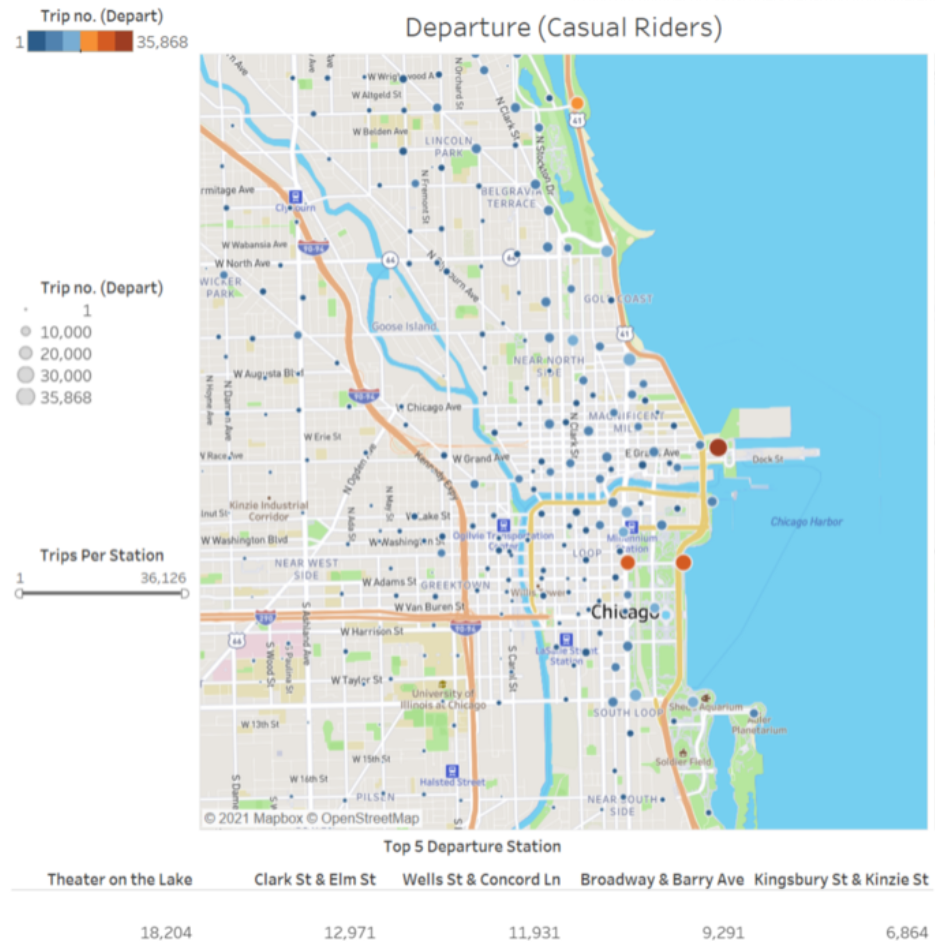

As seen below, majority of the casual riders are biking near navy pier and along the beaches of Chicago on the Lake Front Trail.

Next is the map for members. They are more spread out throughout the city.

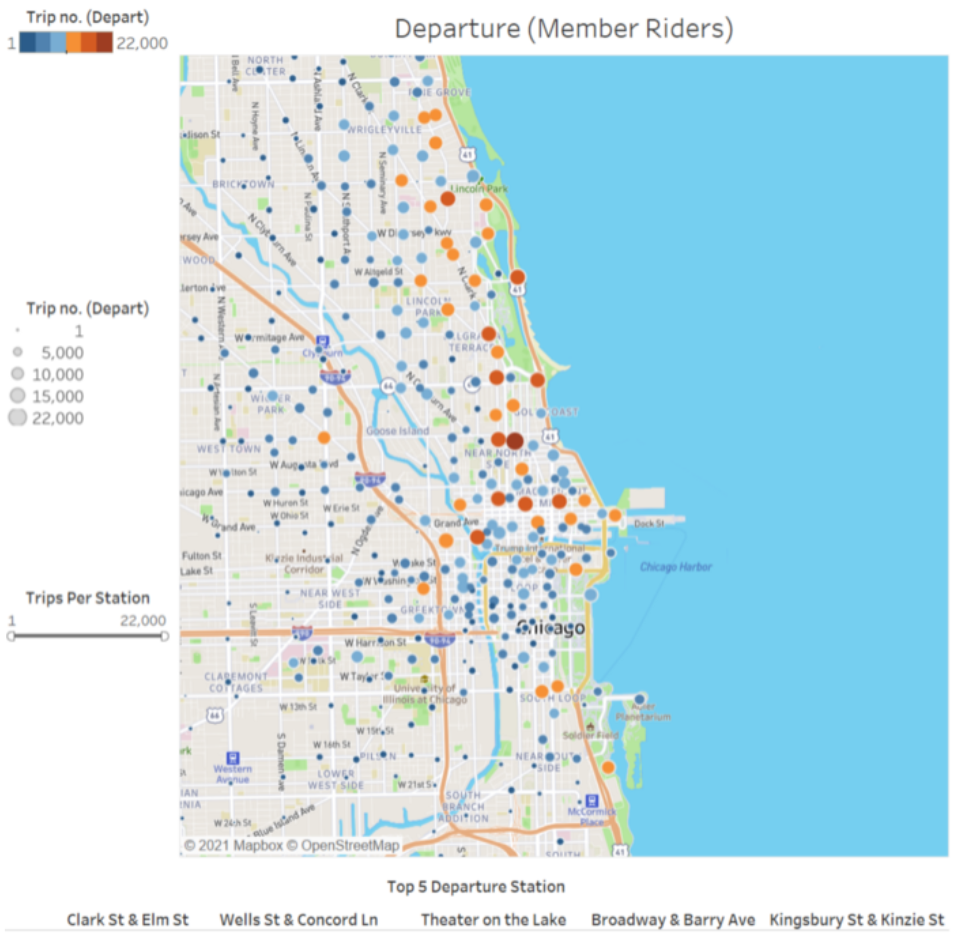


A

Next, I would like to investigate what day of the week that casual and members bike on most.

Below is the graph from Tableau that shows the day of the week members/casual riders bike on. 

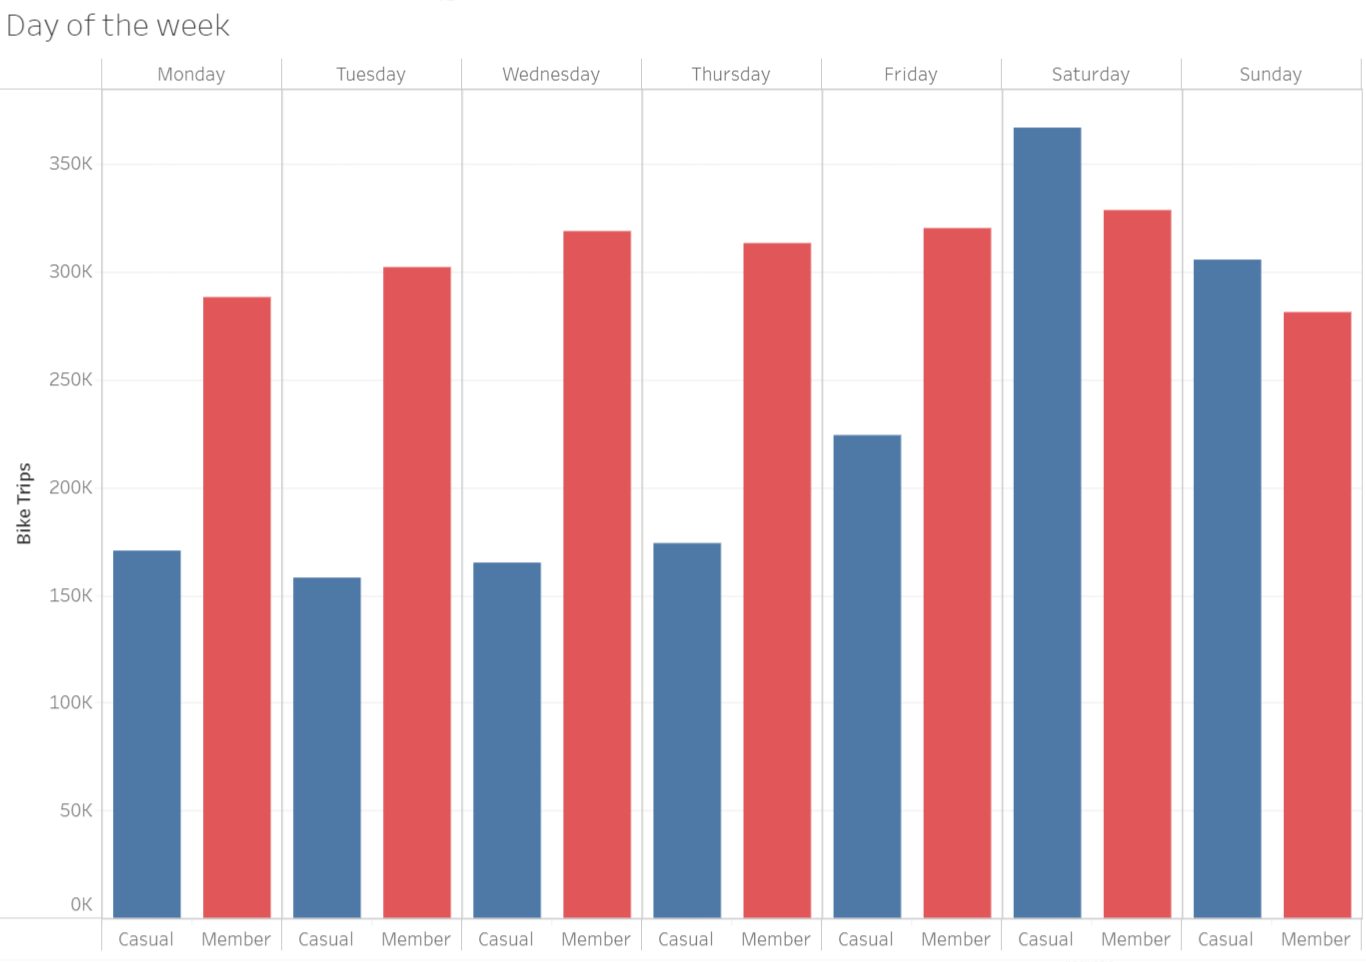

## Part 5 and 6: Share and ACT

After processing and analyzing the dataset according to the business question and statement, I have developed the following actions or strategies for the Director Lily and the Executive team to consider for making effective marketing choices. The goal is to maximize the number of member members by converting the casual riders to grow the company to its full potential in the future. 

* Create more stations along the coast near the lake front trail of chicago to attract more riders such as tourists in the summer. This is because the density of casual riders is greatest near the lake. 

* Since the number of casual riders peaks on Saturday and Sundays, consider advertising membership subscriptions such as promotions for the weekend at a discounted price to convert the casual riders to members. 